# Punto 2

## Librerías Utilizadas

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE

## Wind Speed EDA

Iniciamos cargando el dataset y observando las primeras filas.

In [2]:
wind = pd.read_csv("https://raw.githubusercontent.com/lihkir/Data/main/wind_speed/data_treino_dv_df_2000_2010.csv")
wind.head()

,HORA (UTC),"VENTO, DIREï¿½ï¿½O HORARIA (gr) (ï¿½ (gr))","VENTO, VELOCIDADE HORARIA (m/s)",UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),TEMPERATURA Mï¿½XIMA NA HORA ANT. (AUT) (ï¿½C),TEMPERATURA Mï¿½NIMA NA HORA ANT. (AUT) (ï¿½C),"UMIDADE RELATIVA DO AR, HORARIA (%)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)","PRECIPITAï¿½ï¿½O TOTAL, HORï¿½RIO (mm)","VENTO, RAJADA MAXIMA (m/s)",PRESSï¿½O ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSï¿½O ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)
0,12:00,0.809017,1.8,69.0,60.0,22.6,20.7,61.0,888.2,0.0,3.8,888.2,887.7
1,13:00,0.965926,2.7,62.0,55.0,24.2,22.5,55.0,888.4,0.0,4.7,888.4,888.2
2,14:00,0.891007,2.0,56.0,50.0,25.5,24.3,51.0,888.1,0.0,4.9,888.4,888.1
3,15:00,0.848048,2.5,52.0,44.0,27.4,25.0,44.0,887.4,0.0,5.8,888.1,887.4
4,16:00,0.224951,2.4,50.0,43.0,27.1,25.5,46.0,886.5,0.0,5.8,887.4,886.5


A primera vista se puede notar que las columnas tienen nombres muy largos y que se dificulta la interpretación de cada variable. También, se observa que todas las variables son numéricas, a excepción de la hora que es temporal. Veamos con más detalle los nombres de las columnas.

In [3]:
wind.columns

Index(['HORA (UTC)', 'VENTO, DIREï¿½ï¿½O HORARIA (gr) (ï¿½ (gr))',
       'VENTO, VELOCIDADE HORARIA (m/s)',
       'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)',
       'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)',
       'TEMPERATURA Mï¿½XIMA NA HORA ANT. (AUT) (ï¿½C)',
       'TEMPERATURA Mï¿½NIMA NA HORA ANT. (AUT) (ï¿½C)',
       'UMIDADE RELATIVA DO AR, HORARIA (%)',
       'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)',
       'PRECIPITAï¿½ï¿½O TOTAL, HORï¿½RIO (mm)', 'VENTO, RAJADA MAXIMA (m/s)',
       'PRESSï¿½O ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)',
       'PRESSï¿½O ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)'],
      dtype='object')

Procederemos a realizar un cambio en los nombres de las columnas puesto que se dificulta la lectura de estas. El dataset con las nombres de las variables cambiadas es el siguiente:

In [4]:
columnas = {'HORA (UTC)': 'hora', 'VENTO, DIREï¿½ï¿½O HORARIA (gr) (ï¿½ (gr))': 'direccion_viento', 
            'VENTO, VELOCIDADE HORARIA (m/s)': 'velocidad_viento', 'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)': 'humedad_max',
            'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)': 'humedad_min', 'TEMPERATURA Mï¿½XIMA NA HORA ANT. (AUT) (ï¿½C)': 'temperatura_max',
            'TEMPERATURA Mï¿½NIMA NA HORA ANT. (AUT) (ï¿½C)': 'temperatura_min', 'UMIDADE RELATIVA DO AR, HORARIA (%)': 'humedad_horaria',
            'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)': 'pres_atmosferica', 'PRECIPITAï¿½ï¿½O TOTAL, HORï¿½RIO (mm)': 'precipitacion_hora',
            'VENTO, RAJADA MAXIMA (m/s)': 'rafaga_max', 'PRESSï¿½O ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)': 'pres_atmosferica_max', 'PRESSï¿½O ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)': 'pres_atmosferica_min'}
wind = wind.rename(columns=columnas)
wind.head()

,hora,direccion_viento,velocidad_viento,humedad_max,humedad_min,temperatura_max,temperatura_min,humedad_horaria,pres_atmosferica,precipitacion_hora,rafaga_max,pres_atmosferica_max,pres_atmosferica_min
0,12:00,0.809017,1.8,69.0,60.0,22.6,20.7,61.0,888.2,0.0,3.8,888.2,887.7
1,13:00,0.965926,2.7,62.0,55.0,24.2,22.5,55.0,888.4,0.0,4.7,888.4,888.2
2,14:00,0.891007,2.0,56.0,50.0,25.5,24.3,51.0,888.1,0.0,4.9,888.4,888.1
3,15:00,0.848048,2.5,52.0,44.0,27.4,25.0,44.0,887.4,0.0,5.8,888.1,887.4
4,16:00,0.224951,2.4,50.0,43.0,27.1,25.5,46.0,886.5,0.0,5.8,887.4,886.5


Diccionario de variables modificadas:
- **hora**: hora
- **direccion_viento**: Dirección del viento horaria
- **velocidad_viento**: Velocidad horario del viento (m/s) --- (Variable predictora)
- **humedad_max**: Humedad rel. máx. hora anterior (AUT) ( %)
- **humedad_min**: Humedad rel. mín. hora anterior (AUT) ( %)
- **temperatura_max**: Temperatura máx. hora anterior (AUT)
- **temperatura_min**: Temperatura mín. hora anterior (AUT)
- **humedad_horaria**: Humedad relativa horaria ( %)
- **pres_atmosferica**: Presión atmosférica a nivel de estación, horaria (mB)
- **precipitacion_hora**: Precipitación total por hora (mm)
- **rafaga_max**: Máxima ráfaga de viento (m/s)
- **pres_atmosferica_max**: Presión atmosférica máx. hora anterior (AUT) (mB)
- **pres_atmosferica_min**: Presión atmosférica mín. hora anterior (AUT) (mB)

Ahora analicemos el resumen descriptivo de los datos usando la funcion *describe()*

In [5]:
wind.describe()

,direccion_viento,velocidad_viento,humedad_max,humedad_min,temperatura_max,temperatura_min,humedad_horaria,pres_atmosferica,precipitacion_hora,rafaga_max,pres_atmosferica_max,pres_atmosferica_min
count,87693.000000,87693.000000,87693.000000,87693.000000,87693.000000,87693.000000,87693.000000,87693.000000,87693.000000,87693.000000,87693.000000,87693.000000
mean,0.405810,2.466192,69.058465,63.176194,21.921264,20.684570,66.146682,887.251925,0.160907,5.161076,887.580724,886.891093
std,0.686247,1.313968,19.640222,20.166336,3.721386,3.513744,19.992327,4.012404,1.307515,2.311157,3.646750,3.564539
min,-1.000000,0.000000,12.000000,10.000000,9.200000,8.400000,10.000000,863.400000,0.000000,0.000000,865.300000,862.800000
25%,-0.156434,1.500000,54.000000,48.000000,19.200000,18.400000,51.000000,885.300000,0.000000,3.400000,885.600000,885.000000
50%,0.788011,2.400000,72.000000,64.000000,21.400000,20.200000,68.000000,887.200000,0.000000,5.000000,887.500000,886.900000
75%,0.970296,3.400000,87.000000,80.000000,24.700000,23.100000,84.000000,889.100000,0.000000,6.800000,889.300000,888.800000
max,1.000000,10.000000,100.000000,98.000000,35.300000,34.400000,99.000000,1023.500000,70.800000,24.300000,913.100000,910.900000


En primer lugar se observa que para todas las variables se registran 87693 observaciones. 
- **velocidad_viento**: Con respecto a la variable respuesta, se puede notar que esta variable se distribuye con un mínimo de 0.0 m/s hasta un máximo de 10 m/s, con una velocidad media de 2.46 m/s y una desviación de 1.31. Se puede identificar una dispersión de los datos baja. Asimismo el 50% tiene una velocidad de 2.4 m/s o menos.

- **direccion_viento**: para esta variable se observa que se distribuye con un mínimo de -1 hasta un máximo de 1, con una dirección media de 0.4 y una desviación de 0.68. Se puede identificar una dispersión de los datos significativa. Asimismo el 50% de las observaciones tiene una dirección de 0.78 o menos.

- **humedad_max**: esta variable se distribuye con una humedad mínima de 12 hasta un máximo de 100, con una humedad media de 69.05 y una desviación de 19.64. Se puede identificar una dispersión de los datos media. Asimismo el 50% de las observaciones tiene una humedad de 72 o menos.

- **humedad_min**: esta variable se distribuye con una humedad mínima de 10 hasta un máximo de 98, con una humedad media de 63.176 y una desviación de 20.16. Se puede identificar una dispersión de los datos alta. Asimismo el 25% de las observaciones tiene una humedad de 48 o menos.

- **temperatura_max**: esta variable se distribuye con una temperatura mínima de 9.2 hasta un máximo de 35.3, con una temperatura media de 21.92 y una desviación de 3.72. Asimismo el 25% de las observaciones tiene una temperatura de 19.2 o menos, y el 50% de los datos posee una temperatura de 21.4 o menos.

- **temperatura_min**: esta variable se distribuye con una temperatura mínima de 3.51 hasta un máximo de 34.4, con una temperatura media de 20.68 y una desviación de 3.51. Asimismo el 25% de las observaciones tiene una temperatura de 18.4o menos, y el 50% de los datos posee una temperatura de 20.2 o menos.

- **humedad_horaria**: esta variable se distribuye con una humedad relativa mínima de 10 hasta un máximo de 99, con una humedada media de 66.14 y una desviación de 19.9. Se observa una dispersión alta de los datos.Asimismo el 25% de las observaciones tiene una humedad de 51 o menos, y el 50% de los datos posee una temperatura de 68 o menos.

- **pres_atmosferica**: esta variable se distribuye con una presión atmosférica mínima de 863.4 hasta un máximo de 1023.5, con una presión atmosférica media de 887.25 y una desviación de 4.012. Se observa una dispersión baja de los datos. Asimismo el 25% de las observaciones tiene una humedad de 885.3 o menos, y el 50% de los datos posee una temperatura de 887.20 o menos.

- **precipitacion_hora**: esta variable se distribuye con una precipitación total mínima de 0 hasta un máximo de 70.8, con una precipitación media de 0.16.25 y una desviación de 1.30. 

- **rafaga_max**: esta variable se distribuye con una ráfaga de viento mínima de 0 m/s hasta un máximo de 24.3 m/s, con una ráfaga media de 5.16 y una desviación de 2.31. Asimismo el 25% de las observaciones tiene una ráfaga máxima de 3.4 m/s o menos, y el 50% de los datos posee una ráfaga máxima de 6.8 o menos.

- **pres_atmosferica_max**: esta variable se distribuye con una presión atmosférica mínima de 865.3 hasta un máximo de 913.1, con una presión atmosférica media de 887.5 y una desviación de 3.64. Se observa una dispersión baja de los datos. Asimismo el 25% de las observaciones tiene una humedad de 865.3 o menos, y el 50% de los datos posee una temperatura de 887.5 o menos.

- **pres_atmosferica_min**: esta variable se distribuye con una presión atmosférica mínima de 862.8 hasta un máximo de 910.9, con una presión atmosférica media de 886.89 y una desviación de 3.56 .Se observa una dispersión baja de los datos. Asimismo el 25% de las observaciones tiene una humedad de 885.0 o menos, y el 50% de los datos posee una temperatura de 886.9 o menos.

Ahora veamos el tipo de dato de las variables

In [6]:
wind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87693 entries, 0 to 87692
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   hora                  87693 non-null  object 
 1   direccion_viento      87693 non-null  float64
 2   velocidad_viento      87693 non-null  float64
 3   humedad_max           87693 non-null  float64
 4   humedad_min           87693 non-null  float64
 5   temperatura_max       87693 non-null  float64
 6   temperatura_min       87693 non-null  float64
 7   humedad_horaria       87693 non-null  float64
 8   pres_atmosferica      87693 non-null  float64
 9   precipitacion_hora    87693 non-null  float64
 10  rafaga_max            87693 non-null  float64
 11  pres_atmosferica_max  87693 non-null  float64
 12  pres_atmosferica_min  87693 non-null  float64
dtypes: float64(12), object(1)
memory usage: 8.7+ MB


Se observa que todas las variables son númericas decimales a excepción de la hora es un string. También, se observa que no hay nulos. Sin embargo, comprobemoslo con la función *isna()*.

In [7]:
datos_faltantes = wind.isna().sum()
porcentaje_faltante = (datos_faltantes / len(wind)) * 100
print(porcentaje_faltante)
print("No hay datos faltantes")

hora                    0.0
direccion_viento        0.0
velocidad_viento        0.0
humedad_max             0.0
humedad_min             0.0
temperatura_max         0.0
temperatura_min         0.0
humedad_horaria         0.0
pres_atmosferica        0.0
precipitacion_hora      0.0
rafaga_max              0.0
pres_atmosferica_max    0.0
pres_atmosferica_min    0.0
dtype: float64
No hay datos faltantes


En efecto, no hay datos faltantes por lo que no es necesario usar técnicas de imputación de los datos.

Ahora, analicemos la correlación entre las variables. Para eso observemos la siguiente matriz de correlación:

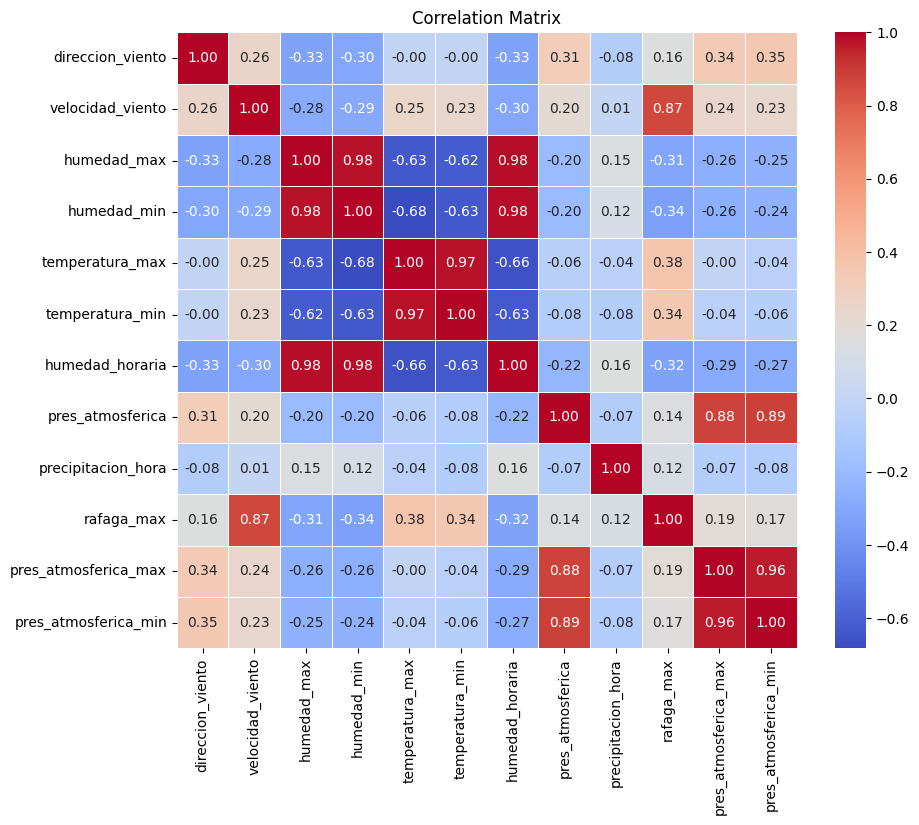

In [8]:
wind_num = wind.drop(columns=['hora'])
correlation_matrix = wind_num.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

Se observa una alta correlación entre variables con características similares como humedad_maxima, humedad_horaria y humedad_minima. Esto sucede de forma similar con las variables relacionadas con la presión atmosférica y temperatura. Esto es esperable ya que son variables que se comportan de forma similar y pueden estar explicando lo mismo. Por otro lado, también se observa una baja-media correlación entre variables con características ambientales distintas como la presión atmosférica y la humedad o la precipitación y la humedad. 

Realicemos la prueba *Variance Inflation Factor (VIF)* para reducir la dimensionalidad de nuestro conjunto de datos y eliminar las columnas altamente correlacionadas.

In [9]:
def VIF_calculation(X):
    VIF = pd.DataFrame()
    VIF["variable"] = X.columns
    VIF["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    VIF = VIF.sort_values('VIF', ascending=False).reset_index(drop = True)
    return(VIF)

def delete_multicollinearity(df, target_name, VIF_threshold):
  X = df.drop(target_name, axis=1)
  VIF_mat = VIF_calculation(X)
  n_VIF = VIF_mat["VIF"][0]
  if (n_VIF <= VIF_threshold):
    print("There is no multicollinearity!")
  else:
    while (n_VIF > VIF_threshold):
      X = X.drop(VIF_mat["variable"][0], axis=1)
      VIF_mat = VIF_calculation(X)
      n_VIF = VIF_mat["VIF"][0]
  display(VIF_mat)
  return X

new_wind = delete_multicollinearity(wind_num, 'velocidad_viento', 10)


,variable,VIF
0,rafaga_max,3.678934
1,humedad_min,3.184922
2,direccion_viento,1.389529
3,precipitacion_hora,1.039001


Luego de realizar la prueba *VIF* nos quedan las variables que no muestran signos significativos de multicolinealidad. Veamos como queda la matriz de correlación.

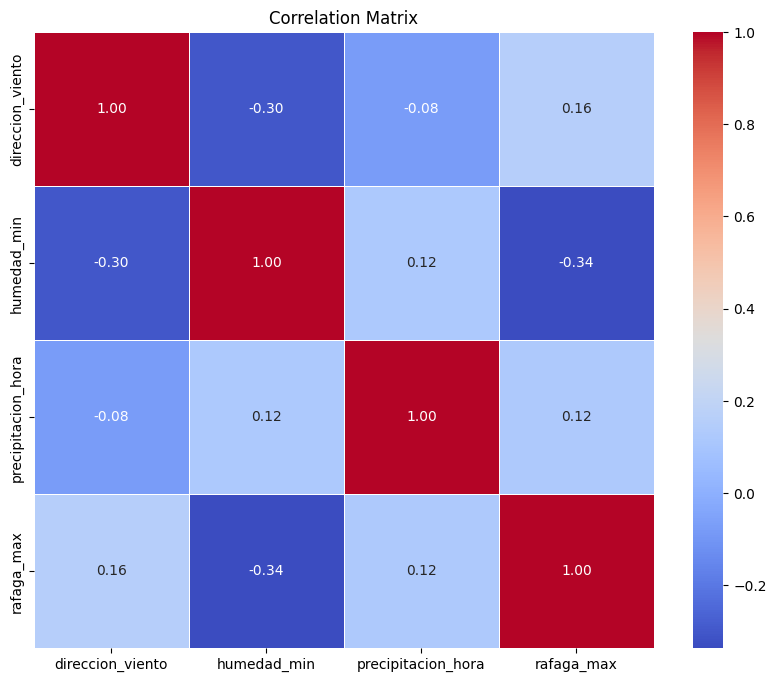

In [10]:
plt.figure(figsize=(10, 8))
sns.heatmap(new_wind.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

Obervamos que ahora los coeficientes de correlación de las variables explicativas son bajos, lo que indica que las variables no explican lo mismo entre si.

Ahora, veamos la distribución de nuestras variables explicativas a través de histogramas

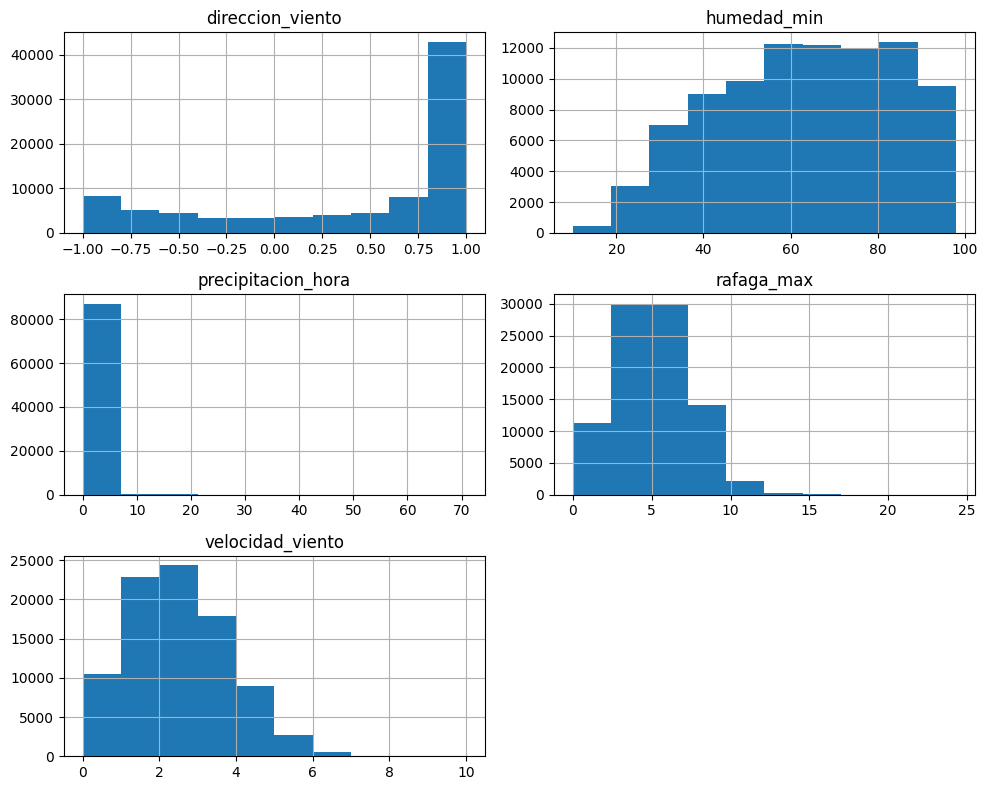

In [11]:
new_wind['velocidad_viento'] = wind['velocidad_viento']
new_wind.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

Observamos que las variables velocidad_viento, rafaga_max y precipitacion_hora presentan una distribución sesgada a la izquierda. Mientras que direccion_viento y humedad_min presentan un sesgo a la derecha. Los datos no están centrados en torno a la media y están dispersos.

Ahora, observemos los gráficos de caja y bigotes donde podremos analizar los datos atípicos y la simetría de las distribuciones de las variables

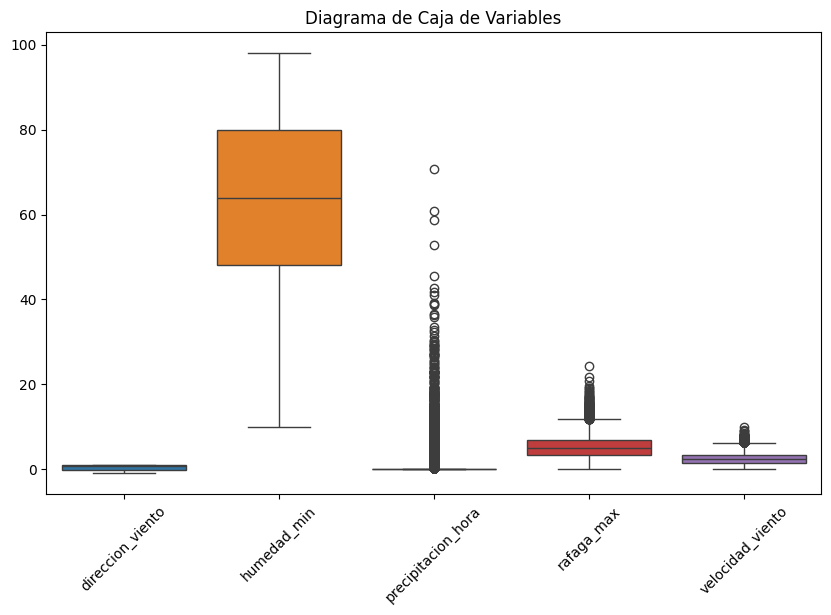

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=new_wind)
plt.title("Diagrama de Caja de Variables")
plt.xticks(rotation=45)
plt.show()

En estos boxplot podemos observar que las variables precipitación_hora, rafaga_max y velocidad_viento presentan muchos datos atípicos, mientras que humedad_min y direccion_viento no tienen.

Por último, observemos los diagramas de dispersión de las variables explicativas con respecto a la variables respuesta (velocidad_viento).

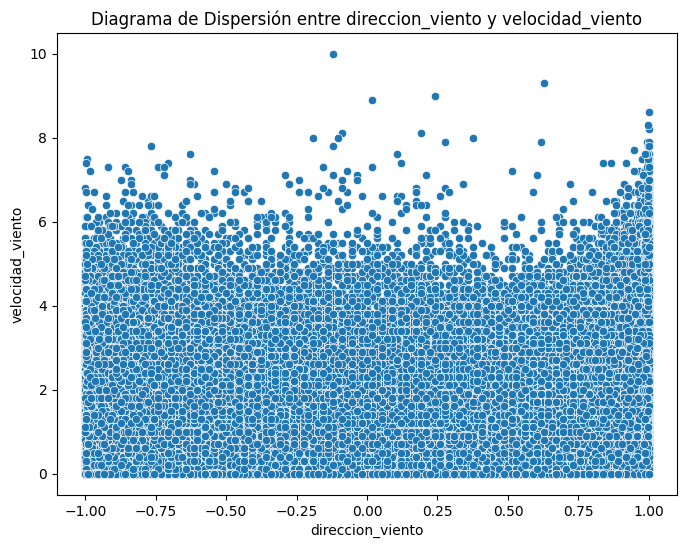

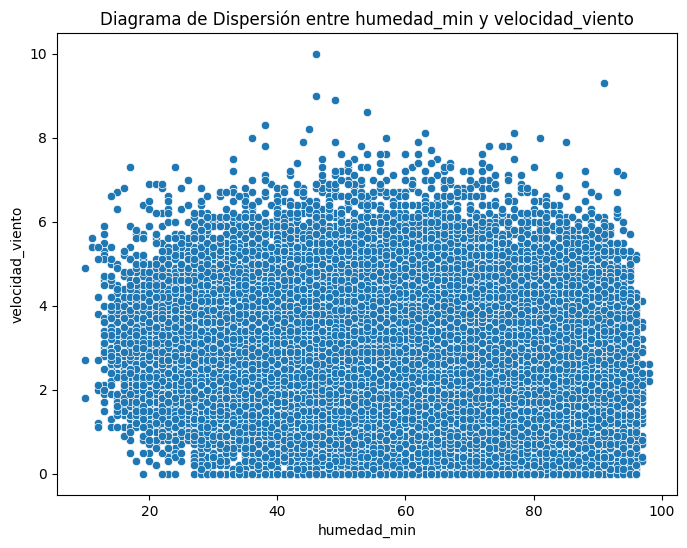

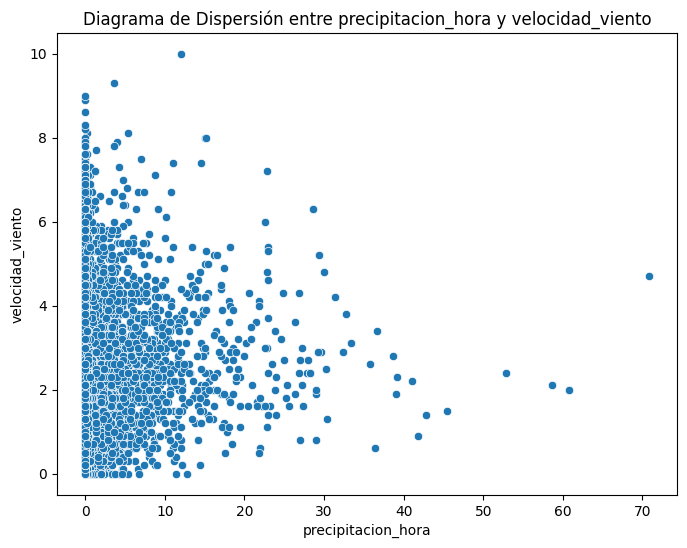

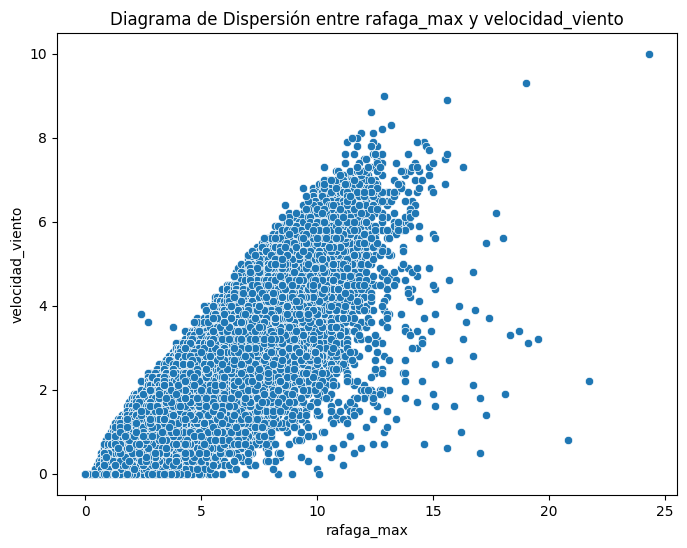

In [13]:
variables_explicativas = new_wind.drop(columns=['velocidad_viento'])
data = pd.concat([new_wind['velocidad_viento'], variables_explicativas], axis=1)

for column in variables_explicativas.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=data, x=column, y='velocidad_viento')
    plt.title(f'Diagrama de Dispersión entre {column} y velocidad_viento')
    plt.xlabel(column)
    plt.ylabel('velocidad_viento')
    plt.show()

Se puede observar que para las variables precipiatcion_hora, direccion_viento y humedad_min no se puede identificar una tendencia lineal clara. Sin embargo, si es posible observar una relación lineal positiva entre la variable respuesta y rafaga_max, es decir, mientras rafaga_max aumenta, la velocidad del viento también lo hace.

## Fraud Detection EDA

Iniciamos cargando los conjunto de datos y observando las primeras observaciones

In [14]:
identity = pd.read_csv('train_identity.csv')
identity.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [15]:
identity.shape

(144233, 41)

El dataset cuenta con 41 columnas por 144233 observaciones

In [16]:
transaction = pd.read_csv('train_transaction.csv')
transaction.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
transaction.shape

(590540, 394)

Se observa que el dataset cuenta con 590540 observaciones con 394 columnas

Ahora analicemos la variable respuesta *isFraud*

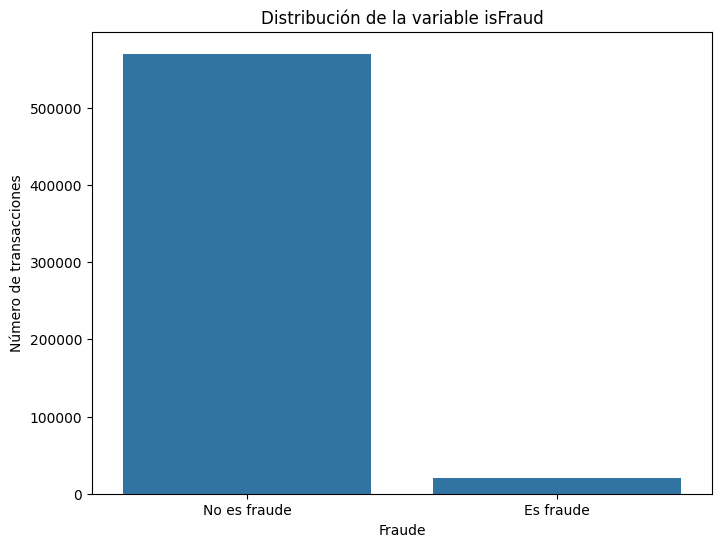

In [18]:
fraude = {0: 'No es fraude', 1: 'Es fraude'}

# Mapeamos los valores de la variable isFraud
colum = transaction['isFraud'].map(fraude)

# Graficamos la distribución de la variable isFraud
plt.figure(figsize=(8, 6))
sns.countplot(x=colum)
plt.xlabel('Fraude')
plt.ylabel('Número de transacciones')
plt.title('Distribución de la variable isFraud')
plt.show()

Se observa que la mayoría de datos en el datset corresponde a la categoría 'No es fraude', mientras que hay muchos menos datos de la categoría 'Es fraude'. Esto significa que tenemos un conjunto de datos desbalanceados.

Procedamos a ver el tipo de datos de las variables:

In [19]:
identity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144233 entries, 0 to 144232
Data columns (total 41 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionID  144233 non-null  int64  
 1   id_01          144233 non-null  float64
 2   id_02          140872 non-null  float64
 3   id_03          66324 non-null   float64
 4   id_04          66324 non-null   float64
 5   id_05          136865 non-null  float64
 6   id_06          136865 non-null  float64
 7   id_07          5155 non-null    float64
 8   id_08          5155 non-null    float64
 9   id_09          74926 non-null   float64
 10  id_10          74926 non-null   float64
 11  id_11          140978 non-null  float64
 12  id_12          144233 non-null  object 
 13  id_13          127320 non-null  float64
 14  id_14          80044 non-null   float64
 15  id_15          140985 non-null  object 
 16  id_16          129340 non-null  object 
 17  id_17          139369 non-nul

Este dataset posee variables tanto numéricas como categóricas. Asimismo, se pueden observar datos faltantes. Más adelante revisaremos este aspecto a detalle.

In [20]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 394 entries, TransactionID to V339
dtypes: float64(376), int64(4), object(14)
memory usage: 1.7+ GB


Debido al gran número de variables que posee este dataset no es posible visualizar el tipo de datos de cada variable. Sin embargo, si de indentifican hay datos numéricos continuos, enteros y categóricos.

A continuación veamos los datos faltantes.

In [21]:
datos_faltantes = identity.isna().sum()
porcentaje_faltante = (datos_faltantes / len(identity)) * 100
print(porcentaje_faltante)

TransactionID     0.000000
id_01             0.000000
id_02             2.330257
id_03            54.016071
id_04            54.016071
id_05             5.108401
id_06             5.108401
id_07            96.425922
id_08            96.425922
id_09            48.052110
id_10            48.052110
id_11             2.256765
id_12             0.000000
id_13            11.726165
id_14            44.503685
id_15             2.251912
id_16            10.325654
id_17             3.372321
id_18            68.722137
id_19             3.407681
id_20             3.447200
id_21            96.423149
id_22            96.416215
id_23            96.416215
id_24            96.708798
id_25            96.441868
id_26            96.420375
id_27            96.416215
id_28             2.256765
id_29             2.256765
id_30            46.222432
id_31             2.739318
id_32            46.207872
id_33            49.187079
id_34            46.056034
id_35             2.251912
id_36             2.251912
i

Se observa que la mayoría de las columnas posee un porcentaje significativo de datos faltantes.

In [22]:
datos_faltantes = transaction.isna().sum()
porcentaje_faltante = (datos_faltantes / len(transaction)) * 100
print(porcentaje_faltante)

TransactionID      0.000000
isFraud            0.000000
TransactionDT      0.000000
TransactionAmt     0.000000
ProductCD          0.000000
                    ...    
V335              86.054967
V336              86.054967
V337              86.054967
V338              86.054967
V339              86.054967
Length: 394, dtype: float64


Al igual que en el anterior dataset se observa que la mayoría de columnas tiene un porcentaje significativo de datos faltantes. Debido al gran número de columnas con datos faltantes se eliminarán aquellas columnas con más de 50% de datos nulos.

In [23]:
def eliminar_columnas_nulos(df, porcentaje_umbral=0.5):
    num_min_no_nulos = len(df) * porcentaje_umbral
    df_filtrado = df.dropna(axis=1, thresh=num_min_no_nulos)
    return df_filtrado

identity = eliminar_columnas_nulos(identity, 0.5)
transaction = eliminar_columnas_nulos(transaction, 0.5)

In [24]:
print("Variables Identity",identity.columns)
print("Variables Transaction", transaction.columns)
transaction.shape[1]

Variables Identity Index(['TransactionID', 'id_01', 'id_02', 'id_05', 'id_06', 'id_09', 'id_10',
       'id_11', 'id_12', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_19',
       'id_20', 'id_28', 'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34',
       'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo'],
      dtype='object')
Variables Transaction Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5',
       ...
       'V312', 'V313', 'V314', 'V315', 'V316', 'V317', 'V318', 'V319', 'V320',
       'V321'],
      dtype='object', length=220)


220

Estas son las columnas que quedaron luego de eliminar las variables con más del 50% de datos faltantes.

A continuación, imputaremos los datos categóricos faltantes con el dato más frecuente

In [25]:
identity = identity.apply(lambda x: x.fillna(x.value_counts().index[0]) if x.dtype == 'O' else x)
transaction = transaction.apply(lambda x: x.fillna(x.value_counts().index[0]) if x.dtype == 'O' else x)

Codifiquemos las variables categóricas con One Hot Encoder.

In [26]:
#Dataset Identity
data1_string = identity.select_dtypes(include=['object'])
encoder1 = OneHotEncoder()
data1_encoded = encoder1.fit_transform(data1_string)
data1_encoded_df = pd.DataFrame(data1_encoded.toarray(), columns=encoder1.get_feature_names_out(data1_string.columns))
identity = pd.concat([identity.drop(columns=data1_string.columns), data1_encoded_df], axis=1)

#Dataset Transaction
data2_string = transaction.select_dtypes(include=['object'])
encoder2 = OneHotEncoder()
data2_encoded = encoder2.fit_transform(data2_string)
data2_encoded_df = pd.DataFrame(data2_encoded.toarray(), columns=encoder2.get_feature_names_out(data2_string.columns))
transaction = pd.concat([transaction.drop(columns=data2_string.columns), data2_encoded_df], axis=1)

Ahora imputaremos los datos númericos con la mediana.

In [27]:
identity = identity.fillna(identity.median())
transaction = transaction.fillna(transaction.median())

## Selección de Variables (Transaction)
Analicemos la correlación entre grupos de variables con características similares del dataset *Transaction*. Iniciemos con las variables que empiezan por *D* y se escogerán las que tengan la menor correlación entre ellas para evitar la colinealidad.

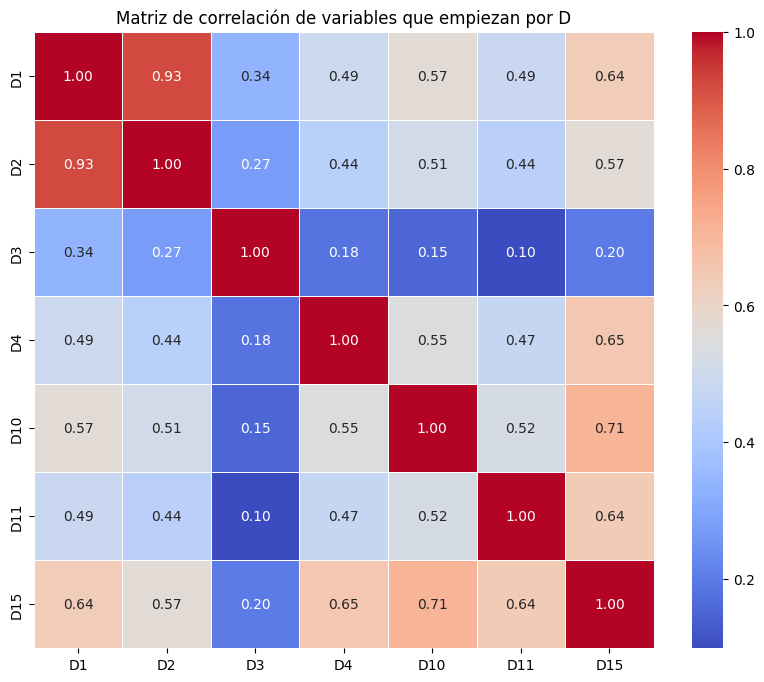

In [28]:
columnas_con_d = [columna for columna in transaction.columns if columna.startswith('D')]
transaction_d = transaction[columnas_con_d]
correlacion = transaction_d.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de correlación de variables que empiezan por D')
plt.show()


Seleccionamos las columnas que tengan la menor correlación entre ellas para evitar la colinealidad. Estas son: *D3, D4, D11* y eliminamos el resto de variables que empiecen por *D*.

In [29]:
columnas_a_mantener = ['D3', 'D4', 'D11']
columnas_a_eliminar = [columna for columna in transaction.columns if columna.startswith('D') and columna not in columnas_a_mantener]

transaction = transaction.drop(columnas_a_eliminar, axis=1)

Ahora hagamos el mismo procedimiento con las variables que empiecen por *C*.

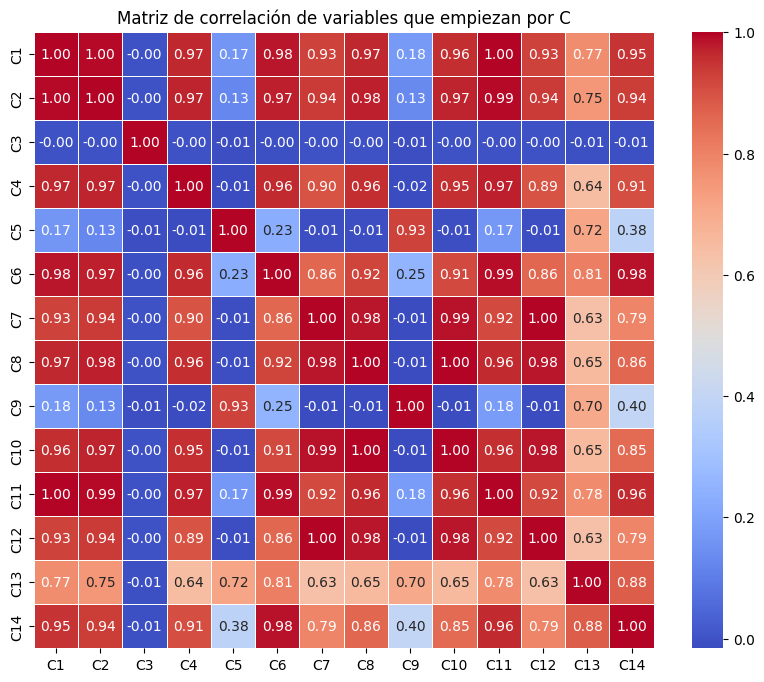

In [30]:
columnas_con_c = [columna for columna in transaction.columns if columna.startswith('C')]
transaction_c = transaction[columnas_con_c]
correlacion = transaction_c.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de correlación de variables que empiezan por C')
plt.show()

Al igual que en el caso anterior se seleccionan las variables que tengan la menos correlación entre ellas. Seleccionamos las columnas *C3, C5* y eliminamos las otras del dataset.

In [31]:
columnas_a_mantener = ['C3', 'C5']
columnas_a_eliminar = [columna for columna in transaction.columns if columna.startswith('C') and columna not in columnas_a_mantener]

transaction = transaction.drop(columnas_a_eliminar, axis=1)

Ahora revisemos los coeficientes de correlación de las variables que inicien con 'card'.

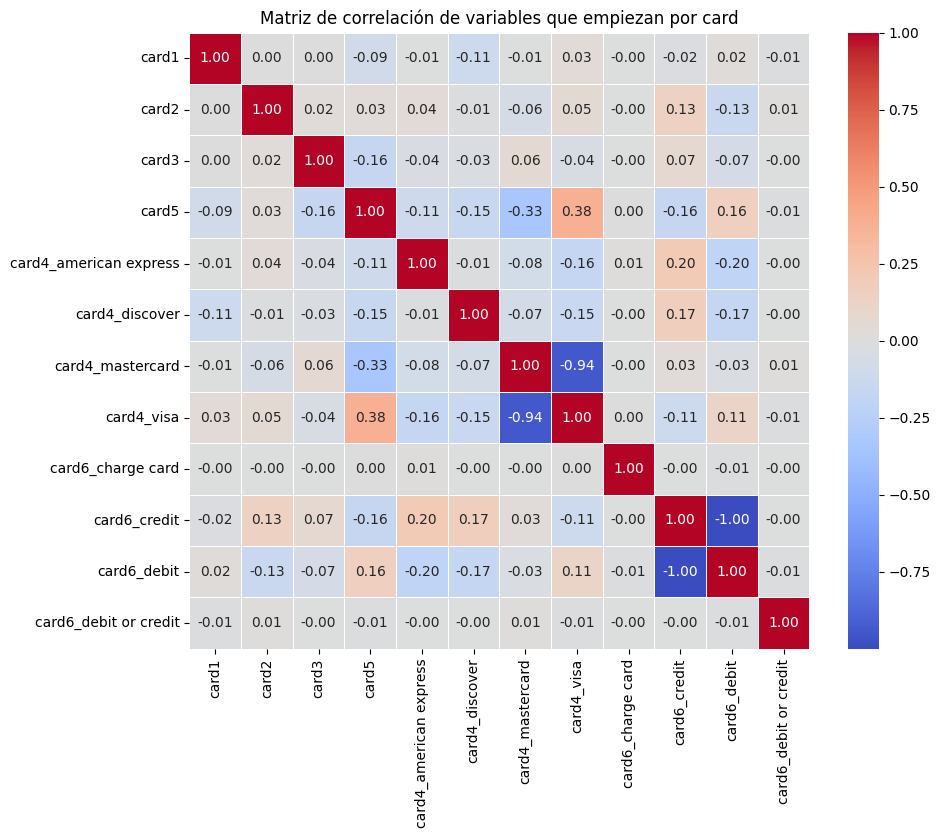

In [32]:
columnas_con_card = [columna for columna in transaction.columns if columna.startswith('card')]
transaction_card = transaction[columnas_con_card]
correlacion = transaction_card.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de correlación de variables que empiezan por card')
plt.show()

Con este conjunto de variables podemos observar que en general tienen baja correlación entre ellas, por lo que se escogeremos las siguientes: *card2, card3* y eliminamos el resto.

In [33]:
columnas_a_mantener = ['card2', 'card3']
columnas_a_eliminar = [columna for columna in transaction.columns if columna.startswith('card') and columna not in columnas_a_mantener]

transaction = transaction.drop(columnas_a_eliminar, axis=1)

Realizamos el mismo procedimiento con las variables que inician con M.

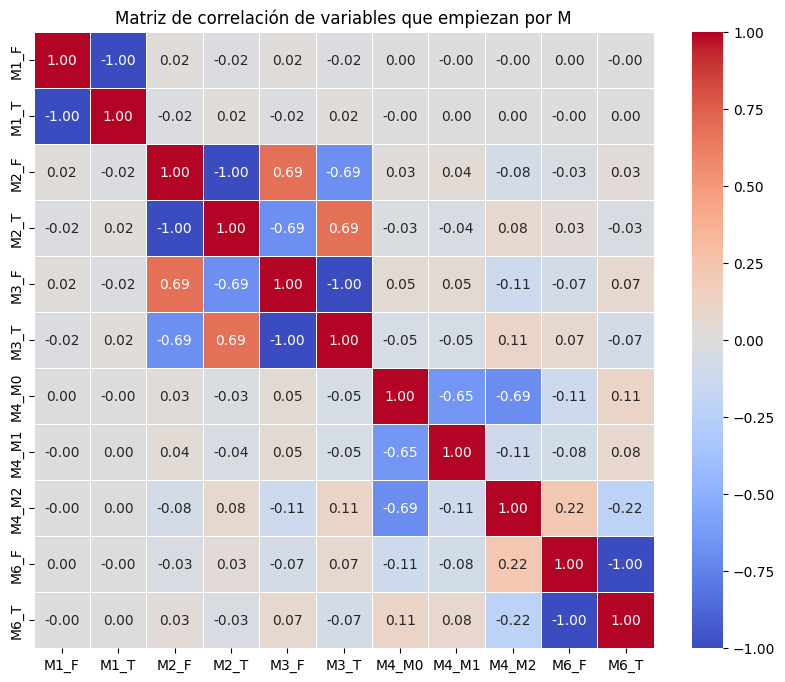

In [34]:
columnas_con_M = [columna for columna in transaction.columns if columna.startswith('M')]
transaction_M = transaction[columnas_con_M]
correlacion = transaction_M.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de correlación de variables que empiezan por M')
plt.show()

Teniendo en cuenta los coeficientes de correlación más bajo entre variables seleccionamos las siguientes, *M6_T, M1_F* y eliminamos el resto.

In [35]:
columnas_a_mantener = ['M6_T', 'M1_F']
columnas_a_eliminar = [columna for columna in transaction.columns if columna.startswith('M') and columna not in columnas_a_mantener]

transaction = transaction.drop(columnas_a_eliminar, axis=1)


Una vez más realizamos el mismo procedimiento pero en este caso analizaremos las variables que inician por 'Product'

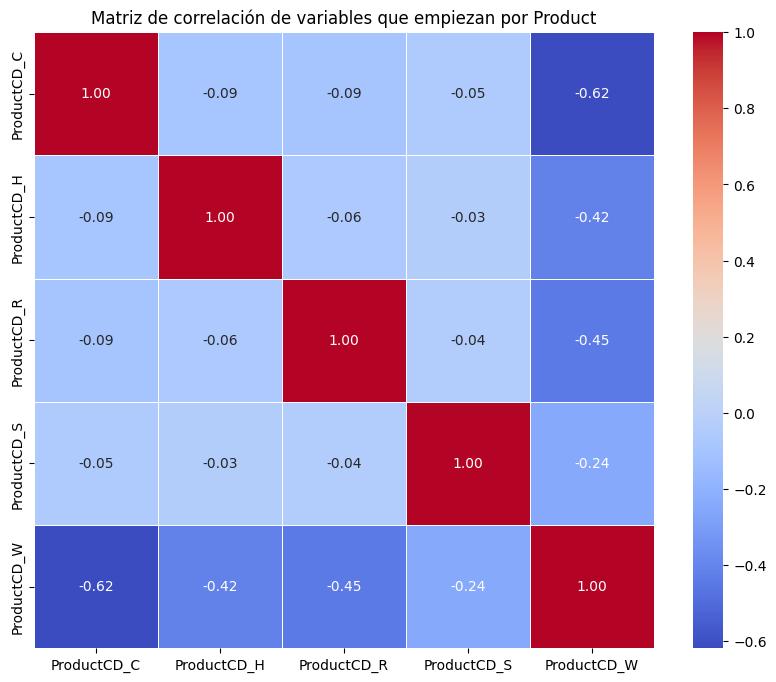

In [36]:
columnas_con_pro = [columna for columna in transaction.columns if columna.startswith('Product')]
transaction_pro = transaction[columnas_con_pro]
correlacion = transaction_pro.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de correlación de variables que empiezan por Product')
plt.show()

Usando el mismo criterio de desición que en los casos anteriores seleccionamos las variables *ProductCD_S, ProductCD_R* y eliminamos el resto.

In [37]:
columnas_a_mantener = ['ProductCD_S', 'ProductCD_R']
columnas_a_eliminar = [columna for columna in transaction.columns if columna.startswith('Product') and columna not in columnas_a_mantener]

transaction = transaction.drop(columnas_a_eliminar, axis=1)

Luego de hacer la anterior selección de variables el dataset resultante sería:

In [47]:
final_transaction = transaction[['isFraud', 'TransactionID','TransactionDT', 'TransactionAmt', 'ProductCD_S', 'ProductCD_R', 'M6_T', 'M1_F', 'card2', 'card3', 'C3', 'C5', 'D3', 'D4', 'D11']]

Por último realicemos la prueba *VIF* para asegurarnos que no haya multicolinelidad entre las variables explicativas

In [48]:
def delete_multicollinearity(df, target_name, VIF_threshold):
    X = df.drop(target_name, axis=1)
    VIF_mat = VIF_calculation(X)
    n_VIF = VIF_mat["VIF"][0]
    if (n_VIF <= VIF_threshold):
        print("There is no multicollinearity!")
    else:
        while (n_VIF > VIF_threshold):
            if "isFraud" in X.columns:
                X = X.drop(VIF_mat["variable"][0], axis=1)
            else:
                break
            VIF_mat = VIF_calculation(X)
            n_VIF = VIF_mat["VIF"][0]
    display(VIF_mat)
    X = pd.concat([X, df[target_name]], axis=1)
    
    return X

final_transaction = delete_multicollinearity(final_transaction, 'isFraud', 10)


,variable,VIF
0,TransactionID,255.959981
1,card3,198.882962
2,TransactionDT,6.747622
3,card2,6.395316
4,D11,1.969355
5,D4,1.879673
6,M6_T,1.689308
7,TransactionAmt,1.357675
8,D3,1.206817
9,ProductCD_R,1.151741


In [64]:
X = final_transaction.drop('isFraud', axis=1)
y = final_transaction['isFraud']

smote = SMOTE()

X_balanced, y_balanced = smote.fit_resample(X, y)

X_balanced_df = pd.DataFrame(X_balanced, columns=X.columns)
y_balanced_df = pd.DataFrame(y_balanced, columns=[y.name]) 

balanced_final_transaction = pd.concat([X_balanced_df, y_balanced_df], axis=1)
balanced_final_transaction

,TransactionID,TransactionDT,TransactionAmt,ProductCD_S,ProductCD_R,M6_T,M1_F,card2,card3,C3,C5,D3,D4,D11,isFraud
0,2987000,86400,68.500000,0.000000,0.000000,1.000000,0.0,361.000000,150.000000,0.0,0.0,13.000000,26.000000,13.000000,0
1,2987001,86401,29.000000,0.000000,0.000000,1.000000,0.0,404.000000,150.000000,0.0,0.0,8.000000,0.000000,43.000000,0
2,2987002,86469,59.000000,0.000000,0.000000,0.000000,0.0,490.000000,150.000000,0.0,0.0,8.000000,0.000000,315.000000,0
3,2987003,86499,50.000000,0.000000,0.000000,0.000000,0.0,567.000000,150.000000,0.0,0.0,0.000000,94.000000,43.000000,0
4,2987004,86506,50.000000,0.000000,0.000000,0.000000,0.0,514.000000,150.000000,0.0,0.0,8.000000,26.000000,43.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1139749,3209802,5254500,191.216505,0.000000,0.000000,0.000000,0.0,562.427465,151.899838,0.0,0.0,7.565751,26.271405,43.000000,1
1139750,3117182,2582343,233.723583,0.000000,0.000000,0.461296,0.0,281.679393,150.000000,0.0,0.0,4.612957,185.078912,43.000000,1
1139751,3412381,10769140,119.433035,0.000000,0.000000,0.570530,0.0,365.483340,150.000000,0.0,0.0,0.000000,105.451900,104.617269,1
1139752,2991775,169304,29.508117,0.673225,0.000000,0.000000,0.0,114.594524,150.000000,0.0,0.0,15.515822,26.000000,43.000000,1


,TransactionID,TransactionDT,TransactionAmt,ProductCD_S,ProductCD_R,M6_T,M1_F,card2,card3,C3,C5,D3,D4,D11,isFraud
0,2987000,86400,68.500000,0.000000,0.0,1.000000,0.0,361.000000,150.000000,0.0,0.000000,13.000000,26.000000,13.0000,0
1,2987001,86401,29.000000,0.000000,0.0,1.000000,0.0,404.000000,150.000000,0.0,0.000000,8.000000,0.000000,43.0000,0
2,2987002,86469,59.000000,0.000000,0.0,0.000000,0.0,490.000000,150.000000,0.0,0.000000,8.000000,0.000000,315.0000,0
3,2987003,86499,50.000000,0.000000,0.0,0.000000,0.0,567.000000,150.000000,0.0,0.000000,0.000000,94.000000,43.0000,0
4,2987004,86506,50.000000,0.000000,0.0,0.000000,0.0,514.000000,150.000000,0.0,0.000000,8.000000,26.000000,43.0000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1139749,2987755,101462,97.591153,0.000000,0.0,0.855063,0.0,387.668345,155.072783,0.0,0.855063,19.247462,264.940515,43.0000,1
1139750,3377235,9791224,39.951639,0.000000,0.0,0.000000,0.0,545.000000,185.000000,0.0,0.000000,51.720174,14.916012,43.0000,1
1139751,3203444,5027715,96.592271,0.929682,0.0,0.000000,0.0,516.179844,152.461114,0.0,0.000000,8.000000,24.734284,43.0000,1
1139752,3116221,2571736,118.993566,0.732485,0.0,0.000000,0.0,413.910781,150.000000,0.0,0.000000,5.859880,20.649700,37.6497,1


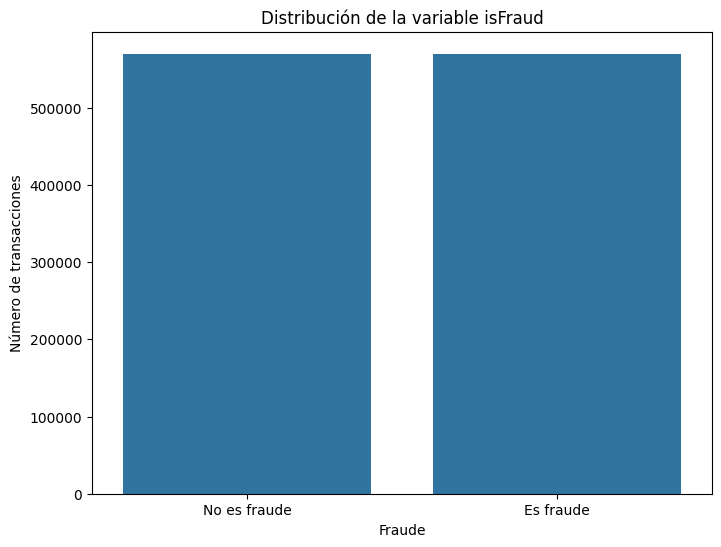

In [65]:
fraude = {0: 'No es fraude', 1: 'Es fraude'}

colum = balanced_final_transaction['isFraud'].map(fraude)
plt.figure(figsize=(8, 6))
sns.countplot(x=colum)
plt.xlabel('Fraude')
plt.ylabel('Número de transacciones')
plt.title('Distribución de la variable isFraud')
plt.show()

## Análisis Gráfico de los datos
Para realizar este análisis se considerarán las siguientes variables:
TransactionDT, TransactionAmt, ProductCD_R, C5, isFraud

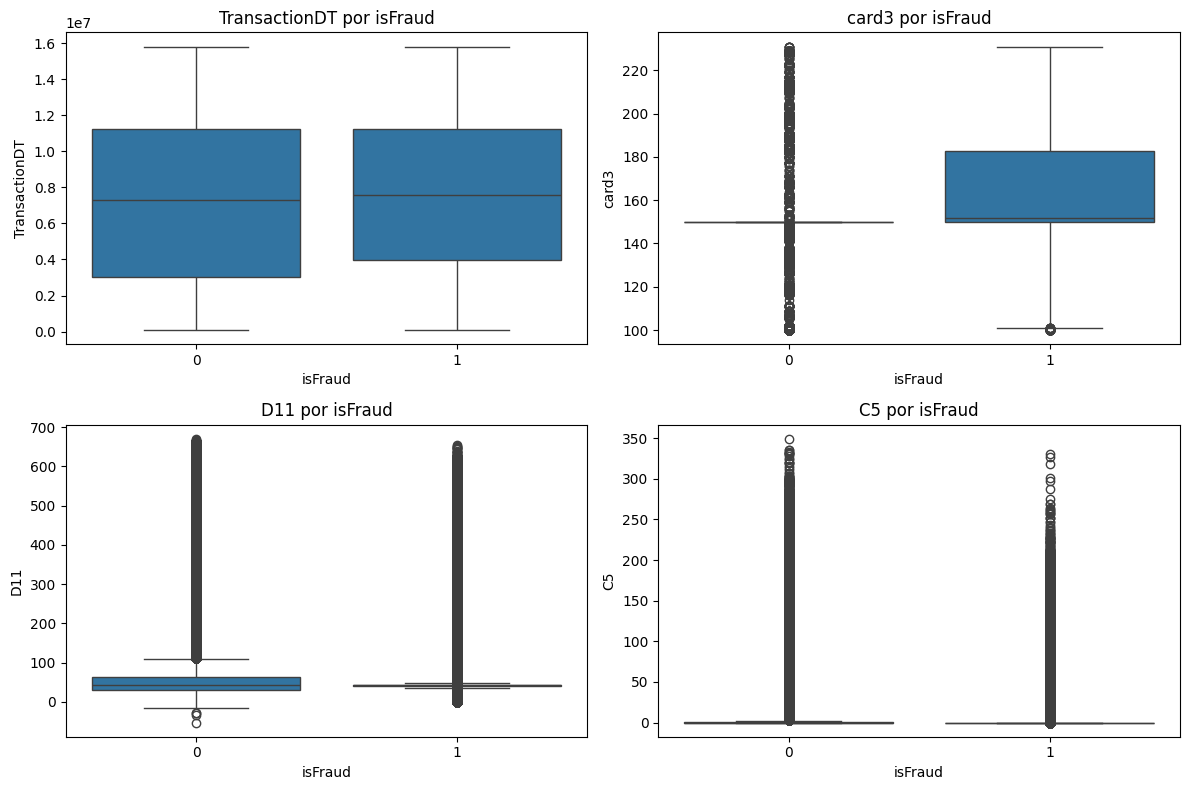

In [74]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.boxplot(x='isFraud', y='TransactionDT', data=balanced_final_transaction)
plt.title('TransactionDT por isFraud')

plt.subplot(2, 2, 2)
sns.boxplot(x='isFraud', y='card3', data=balanced_final_transaction)
plt.title('card3 por isFraud')

plt.subplot(2, 2, 3)
sns.boxplot(x='isFraud', y='D11', data=balanced_final_transaction)
plt.title('D11 por isFraud')

plt.subplot(2, 2, 4)
sns.boxplot(x='isFraud', y='C5', data=balanced_final_transaction)
plt.title('C5 por isFraud')

plt.tight_layout()
plt.show()

Se puede obsservar que para la variable **TransactionDT** las cajas son simétricas y no se presentan datos nulos, además la distribución de los datos es similar para ambas clases. En el caso de la variable **card3**, se observa que para la etiqueta 0 (No es fraude) se presentan muchísimos datos atípicos, y para la etiqueta 1 (Es fraude) se presenta una fuerte asimetría y un dato atípico. Para la variable **D11**, también se presentan muchísimos datos atípicos y esto indica una gran concentración de datos extremadamente altos. Por útlimo, para la variable **C5**, sucede de forma similar que en el caso anterior, se presentan muchísimos datos atípicos en la zona superior de la caja, lo que indica una gran concentración de datos muy altos. 

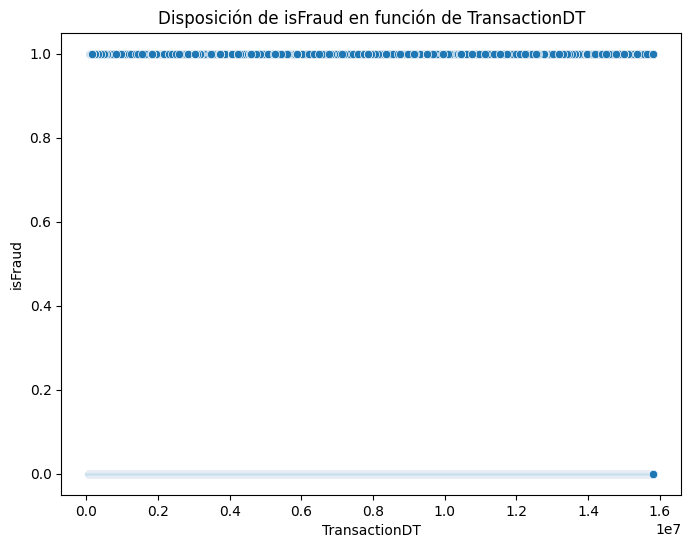

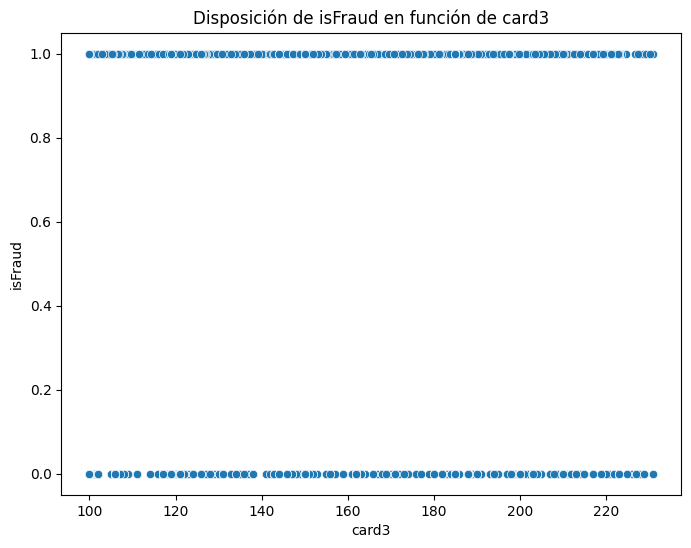

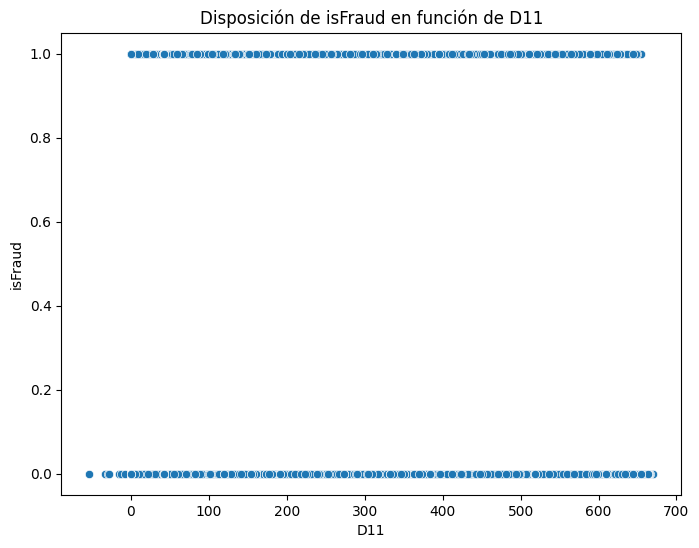

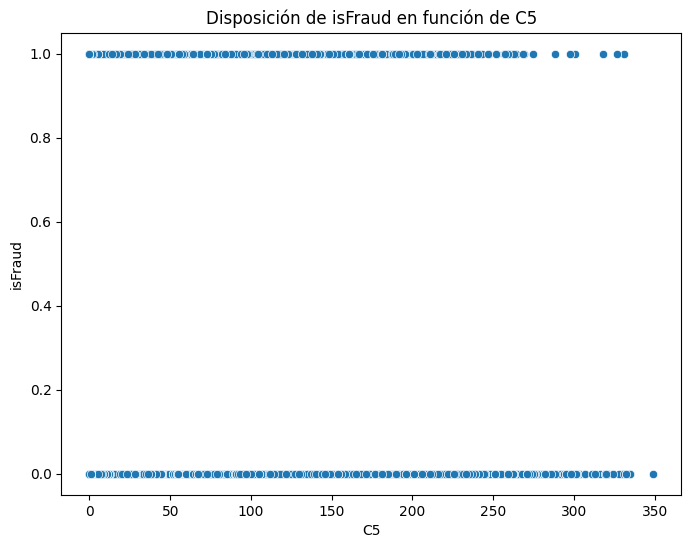

In [77]:
variables_independientes = ['TransactionDT', 'card3', 'D11', 'C5']

for variable in variables_independientes:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=variable, y='isFraud', data=balanced_final_transaction)
    plt.title(f'Disposición de isFraud en función de {variable}')
    plt.xlabel(variable)
    plt.ylabel('isFraud')
    plt.show()

Se observa que en términos generales las variables se distribuyen de forma uniforme en ambas clases. A excepción de la variable TransactionDT en donde solo se presenta una observación para la etiqueta 0 (No es fraude). 

## Merge de los dos datasets
Ahora realizaremos un merge de los dos datasets usando la columna *TransactionID*

In [79]:
final_dataset = pd.merge(balanced_final_transaction, identity, on='TransactionID', how='inner')
final_dataset

,TransactionID,TransactionDT,TransactionAmt,ProductCD_S,ProductCD_R,M6_T,M1_F,card2,card3,C3,...,DeviceInfo_verykoolS5019,DeviceInfo_verykoolS5524,DeviceInfo_verykoolS5525,DeviceInfo_verykoolS5530 Build/LMY47I,DeviceInfo_verykools4009,DeviceInfo_verykools5004,DeviceInfo_verykools5034,DeviceInfo_verykools5035,DeviceInfo_vivo,DeviceInfo_xs-Z47b7VqTMxs
0,2987004,86506,50.000000,0.000000,0.0,0.00000,0.0,514.000000,150.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2987008,86535,15.000000,0.000000,0.0,0.00000,0.0,100.000000,150.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2987010,86549,75.887000,0.000000,0.0,0.00000,0.0,352.000000,117.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2987011,86555,16.495000,0.000000,0.0,0.00000,0.0,375.000000,185.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2987016,86620,30.000000,0.000000,0.0,0.00000,0.0,555.000000,150.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309673,3495033,13302508,14.325000,0.000000,0.0,0.00000,0.0,544.415500,185.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
309674,3564197,15356981,118.310648,0.000000,0.0,0.45129,0.0,394.422423,150.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
309675,3545698,14781406,125.000000,0.000000,1.0,0.00000,0.0,216.000000,150.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
309676,3209802,5254500,191.216505,0.000000,0.0,0.00000,0.0,562.427465,151.899838,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


En conclusión, luego de realizar todos los análisis descriptivos necesarios de estos conjuntos de datos, se decide usar el dataset transaction con las etiquetas balanceadas para entrenar los modelos de clasificación del punto 3. 

In [ ]:
balanced_final_transaction.to_csv('balanced_final_transaction.csv', index=False)